### # 통합본 파일 불러오기

In [2]:
import pandas as pd

In [17]:
df_bus_card_tot = pd.read_csv("./02_data_통합본/df_bus_card_tot.csv")

len(df_bus_card_tot)

1057872

In [22]:
df_bus_card_tot.head()

,승차시각,하차시각,승객구분,환승여부,추가운임여부,승차정류장,하차정류장,버스내체류시간(분),기준년도,기준월,기준일,기준시간,기준시간(분)
0,2020-03-27 05:14:12,2020-03-27 05:17:14,일반,N,N,문덕사거리,성우오토모티브,3,2020,3,27,5,14
1,2020-03-27 05:15:14,2020-03-27 05:49:56,일반,N,N,준양주택3차,오거리,34,2020,3,27,5,15
2,2020-03-27 05:23:43,2020-03-27 05:46:59,일반,N,N,두호동주민센터,남구보건소,23,2020,3,27,5,23
3,2020-03-27 05:24:49,2020-03-27 05:54:12,일반,N,N,천마아파트,홈플러스,30,2020,3,27,5,24
4,2020-03-27 05:28:48,2020-03-27 05:52:31,일반,N,N,오천농협세계지점,죽도시장,24,2020,3,27,5,28


## 데이터 시각화 분석

In [8]:
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

from matplotlib import font_manager, rc

import platform

plt.rc('font', family = 'Malgun Gothic')

### 1. 기준월 및 기준일자별 버스 이용량 분석 비교
  * 사용할 분석요소 : 기준월, 기준일, 승객구분
  * 사용할 함수 : count

### # 피봇 테이블 만들기

In [32]:
df_pivot = df_bus_card_tot.pivot_table(values = "승객구분",
                                        index = "기준월",
                                        columns = "기준일",
                                        aggfunc = "count")

df_pivot

기준일,1,2,3,4,5,6,7,8,9,10,...,21,22,24,25,26,27,28,29,30,31
기준월,,,,,,,,,,,,,,,,,,,,,
1,18738.0,16185.0,16614.0,12556.0,19054.0,15494.0,25976.0,15808.0,16788.0,NaN,...,17324.0,34494.0,9125.0,NaN,15562.0,5472.0,NaN,16046.0,31784.0,16202.0
2,11810.0,8547.0,NaN,15507.0,44757.0,NaN,15715.0,34113.0,NaN,31194.0,...,9084.0,5657.0,5938.0,4477.0,10694.0,5422.0,5491.0,3758.0,NaN,NaN
3,2402.0,6545.0,28485.0,11956.0,5830.0,12304.0,4114.0,2827.0,NaN,5345.0,...,NaN,NaN,NaN,131.0,2897.0,4983.0,3875.0,2484.0,NaN,4992.0


### # 결측치 처리

In [34]:
df_pivot = df_pivot.fillna(0)

df_pivot

기준일,1,2,3,4,5,6,7,8,9,10,...,21,22,24,25,26,27,28,29,30,31
기준월,,,,,,,,,,,,,,,,,,,,,
1,18738.0,16185.0,16614.0,12556.0,19054.0,15494.0,25976.0,15808.0,16788.0,0.0,...,17324.0,34494.0,9125.0,0.0,15562.0,5472.0,0.0,16046.0,31784.0,16202.0
2,11810.0,8547.0,0.0,15507.0,44757.0,0.0,15715.0,34113.0,0.0,31194.0,...,9084.0,5657.0,5938.0,4477.0,10694.0,5422.0,5491.0,3758.0,0.0,0.0
3,2402.0,6545.0,28485.0,11956.0,5830.0,12304.0,4114.0,2827.0,0.0,5345.0,...,0.0,0.0,0.0,131.0,2897.0,4983.0,3875.0,2484.0,0.0,4992.0


### # 히트맵 만들기

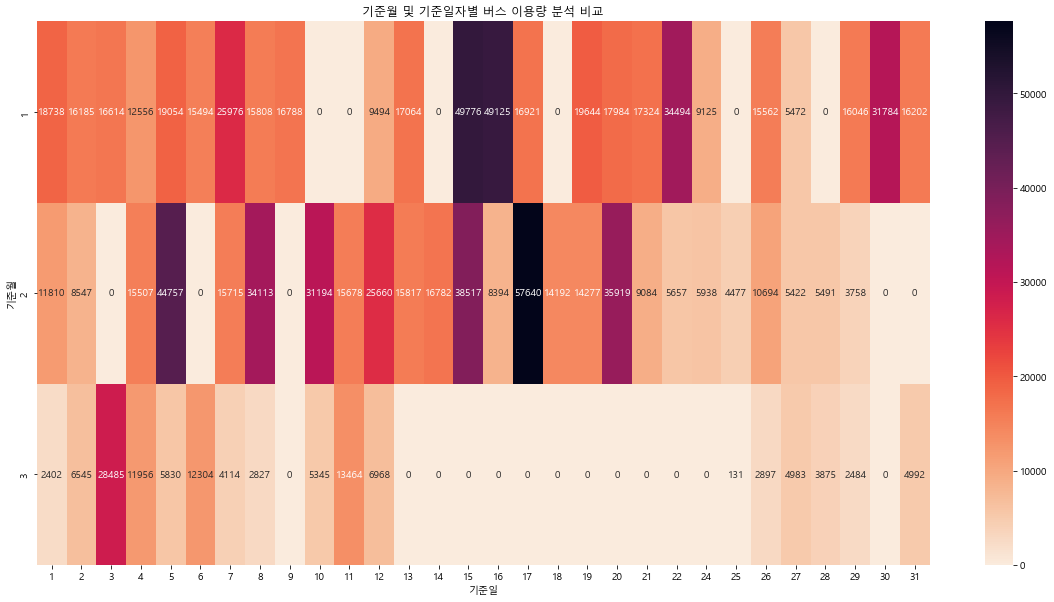

In [36]:
plt.figure(figsize = (20, 10)) # 그래프 크기 설정

sns.heatmap(df_pivot, # 피봇 데이터 넣어서 그래프 그리기
            annot = True, # True = 수치 표시, False = 수치 생략
            fmt = ".0f", # fmt=".0f" 옵션을 하면 소숫점 0자리, "0.1f"는 소숫점 1자리까지 표현.
            cmap = "rocket_r") 

plt.title("기준월 및 기준일자별 버스 이용량 분석 비교") # 타이틀 넣기
          
plt.show() # 보여주기

### 2. 기준일별 시간대별 버스 이용량 분석

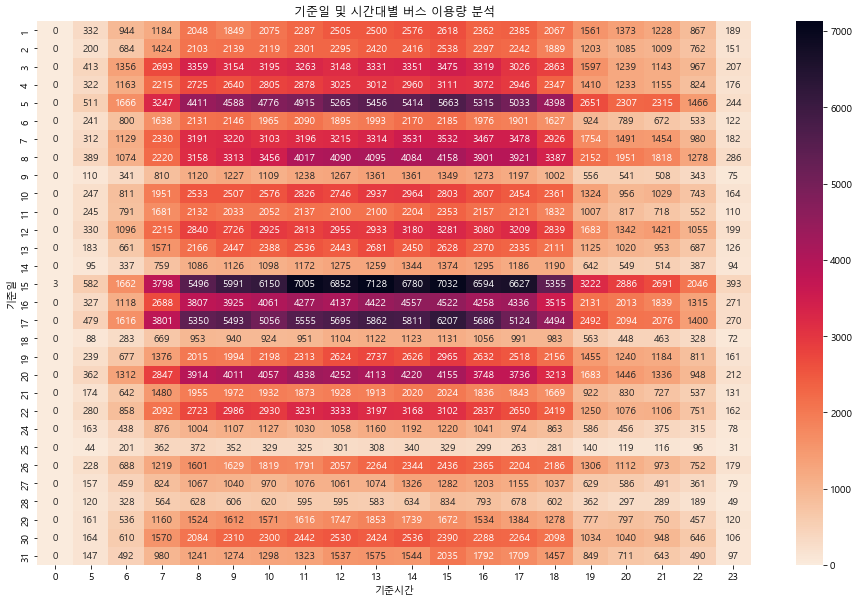

In [53]:
df_pivot = df_bus_card_tot.pivot_table(values = "승객구분",
                                      index = "기준일",
                                      columns = "기준시간",
                                      aggfunc = "count")
# 결측치 = 0
df_pivot = df_pivot.fillna(0)

# 히트맵
plt.figure(figsize = (16,10))

sns.heatmap(df_pivot, annot = True, fmt = ".0f", cmap = "rocket_r")

plt.title("기준일 및 시간대별 버스 이용량 분석")

plt.show()

### 3. 기준시간 및 분별 버스 이용량 분석

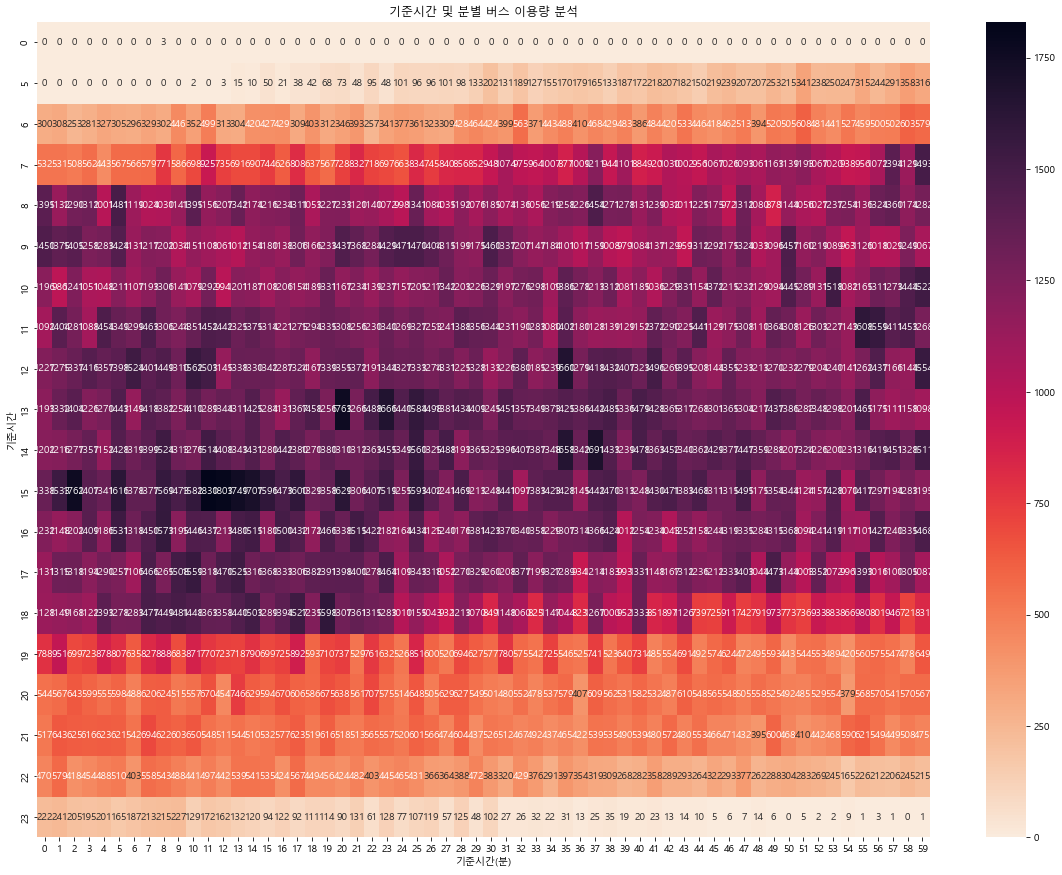

In [52]:
df_pivot = df_bus_card_tot.pivot_table(values = "승객구분",
                                      index = "기준시간",
                                      columns = "기준시간(분)",
                                      aggfunc = "count")

# 결측치 = 0

df_pivot = df_pivot.fillna(0)

# 히트맵

plt.figure(figsize = (20,15))

sns.heatmap(df_pivot, annot = True, fmt = ".0f", cmap = "rocket_r")

plt.title("기준시간 및 분별 버스 이용량 분석")

plt.show()

### 4. 기준일별 시간대별 버스내 체류시간(분) 분석

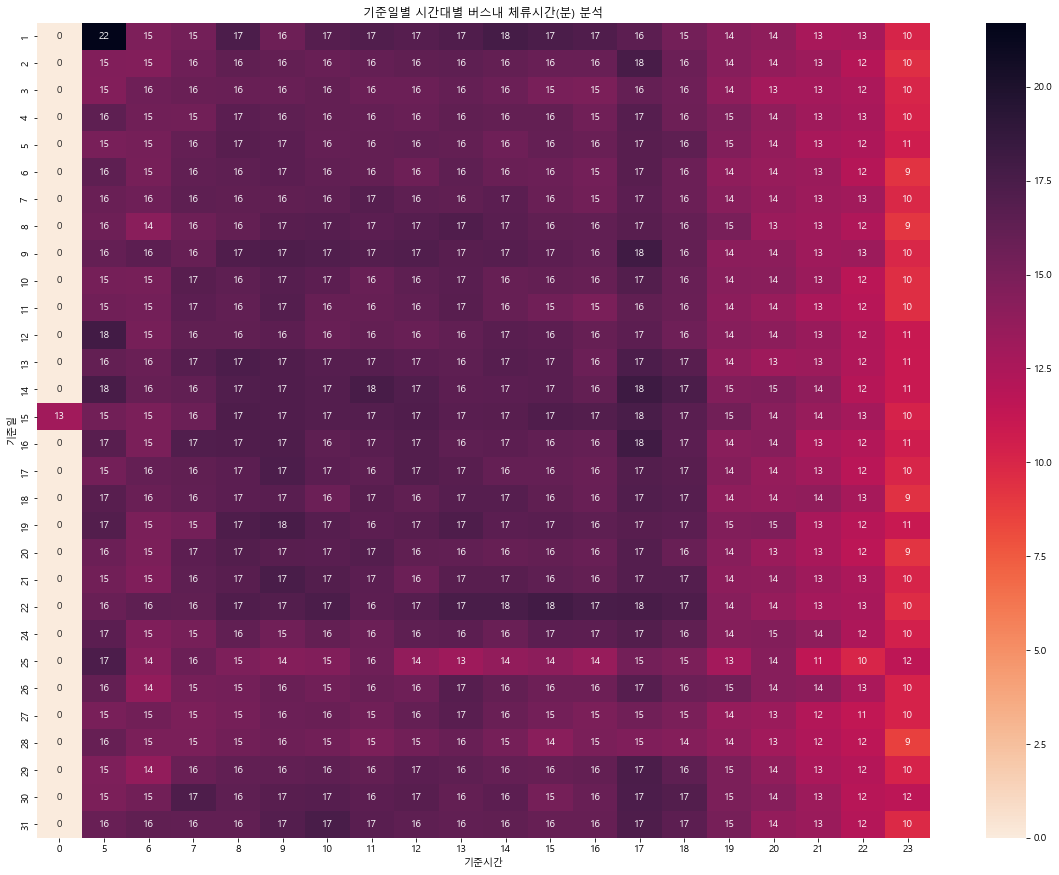

In [54]:
df_pivot = df_bus_card_tot.pivot_table(values = "버스내체류시간(분)",
                                      index = "기준일",
                                      columns = "기준시간",
                                      aggfunc = "mean")

# 결측치 = 0

df_pivot = df_pivot.fillna(0)

# 히트맵

plt.figure(figsize = (20,15))

sns.heatmap(df_pivot, annot = True, fmt = ".0f", cmap = "rocket_r")

plt.title("기준일별 시간대별 버스내 체류시간(분) 분석")

plt.show()

### 5. 시간대별 승객구분별 버스내 체류시간(분) 분석
  * 승객구분 컬럼은 범주형 데이터를 가지고 있어서 '막대그래프'나 '선그래프'가 적당하다

In [57]:
df_temp = pd.DataFrame()

df_temp["기준시간"] = df_bus_card_tot["기준시간"]

df_temp["승객구분"] = df_bus_card_tot["승객구분"]

df_temp["버스내체류시간"] = df_bus_card_tot["버스내체류시간(분)"]

df_temp

,기준시간,승객구분,버스내체류시간
0,5,일반,3
1,5,일반,34
2,5,일반,23
3,5,일반,30
4,5,일반,24
...,...,...,...
1057867,23,일반,11
1057868,23,일반,8
1057869,23,일반,1
1057870,23,일반,7


### # 범주형 데이터값 종류 확인

In [58]:
df_temp.drop_duplicates(["승객구분"])

,기준시간,승객구분,버스내체류시간
0,5,일반,3
97,6,청소년,0
133,6,None,8
265,7,어린이,7


### # 그룹 짓기

In [60]:
df_temp2 = (df_temp.groupby(["기준시간", "승객구분"], as_index = False).sum()).\
            sort_values(by = ["버스내체류시간"], ascending = False)

### # 행렬 위치 변경

In [62]:
df_temp2.head(10).transpose()

,43,39,35,31,27,51,19,47,23,15
기준시간,15,14,13,12,11,17,9,16,10,8
승객구분,일반,일반,일반,일반,일반,일반,일반,일반,일반,일반
버스내체류시간,1252395,1228199,1219021,1184269,1175996,1153803,1146414,1128590,1126060,1113955


### # 그래프화

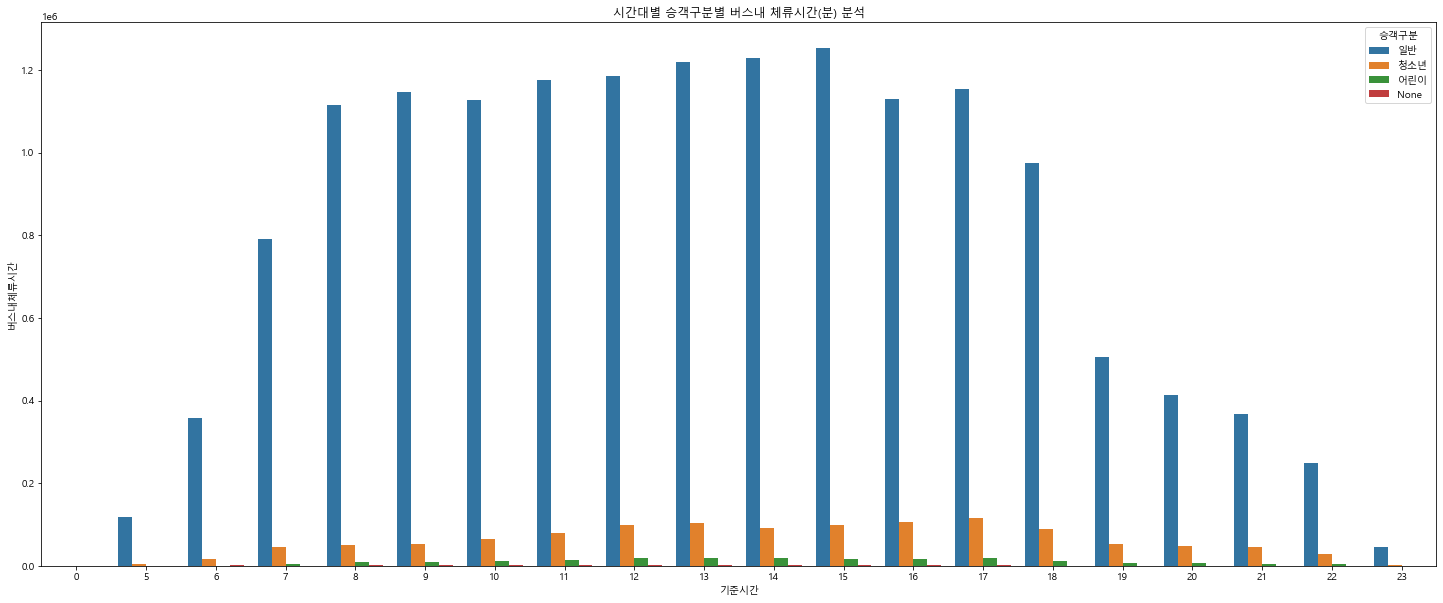

In [67]:
fig = plt.figure(figsize = (25, 10))

sns.barplot(x = "기준시간", y = "버스내체류시간", hue = "승객구분", data = df_temp2)

plt.title("시간대별 승객구분별 버스내 체류시간(분) 분석")

plt.show()

### # 시간 및 승객구분별 빈도분석

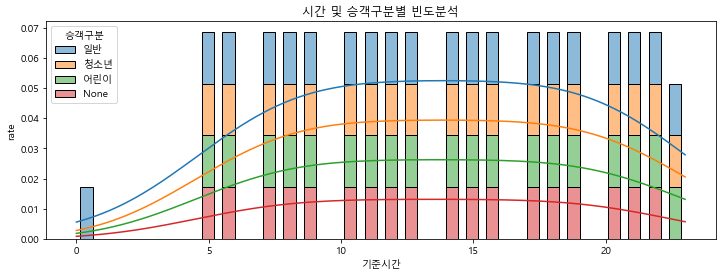

In [66]:
plt.figure(figsize = (12,4))

g = sns.histplot(data = df_temp2,
                x = "기준시간",
                bins = 30, # bin 개수
                kde = True, # 막대그래프에 선그리기(밀도표시선)
                hue = "승객구분",
                multiple = 'stack', # dodge
                stat = "density", # 비율로 확인하고자 할 때
                shrink = 0.6)

plt.title("시간 및 승객구분별 빈도분석")

plt.xlabel("기준시간")
plt.ylabel("rate")

plt.show()

### # 승하차정류장별 버스내 체류시간(분) 상위 30건 분석 비교

In [72]:
df_temp = pd.DataFrame()

df_temp["승하차정류장"] = df_bus_card_tot["승차정류장"] + " --> " + \
                            df_bus_card_tot["하차정류장"]

df_temp["승객구분"] = df_bus_card_tot["승객구분"]

df_temp["버스내체류시간"] = df_bus_card_tot["버스내체류시간(분)"]

df_temp

,승하차정류장,승객구분,버스내체류시간
0,문덕사거리 --> 성우오토모티브,일반,3
1,준양주택3차 --> 오거리,일반,34
2,두호동주민센터 --> 남구보건소,일반,23
3,천마아파트 --> 홈플러스,일반,30
4,오천농협세계지점 --> 죽도시장,일반,24
...,...,...,...
1057867,창포사거리 --> 삼구4차,일반,11
1057868,오거리 --> 문화예술회관,일반,8
1057869,롯데백화점 --> 영일대 해수욕장,일반,1
1057870,죽도파출소 --> 롯데아파트,일반,7


In [75]:
# 승하차정류장 및 승객구분별로 버스내체류시간의 sum 구하기

df_temp_sel = (df_temp.groupby(["승하차정류장", "승객구분"],
                              as_index = False).sum()).sort_values(by=["버스내체류시간"],
                                                                   ascending = False).head(30)

df_temp_sel

,승하차정류장,승객구분,버스내체류시간
19211,시외버스터미널 --> 죽도시장,일반,122143
37903,흥해환승센터 --> 죽도시장,일반,79367
29508,죽도시장 --> 흥해환승센터,일반,55265
37911,흥해환승센터 --> 중앙상가,일반,55092
10644,두호초등학교 --> 죽도시장,일반,46710
18745,시외버스터미널 --> 구룡포환승센터,일반,45828
27951,장성초등학교 --> 죽도시장,일반,44890
3512,구룡포근대화거리 --> 시외버스터미널,일반,42569
1989,경북자동차학원 --> 죽도시장,일반,42328
12096,문덕사거리 --> 시외버스터미널,일반,42082


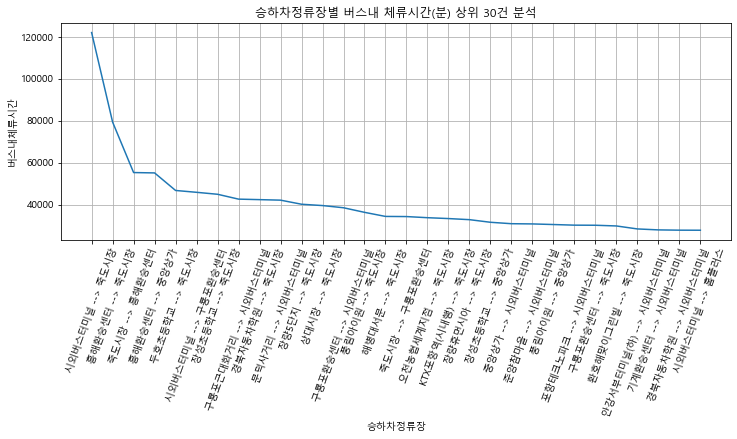

In [81]:
# 그래프 사이즈 지정
plt.figure(figsize = (12,4))

# 데이터 x축, y축 넣기
plt.plot(df_temp_sel["승하차정류장"], df_temp_sel["버스내체류시간"])

# 그래프 제목
plt.title("승하차정류장별 버스내 체류시간(분) 상위 30건 분석")

# x축 제목
plt.xlabel("승하차정류장")

# y축 제목
plt.ylabel("버스내체류시간")

# x축 표시값을 90도 수직으로 표현
plt.xticks(rotation = 70)

# 그래프내 그리드선 표시
plt.grid(True)

plt.show()